## Import

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import collections
import logging
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import core.artificial_signal_generators as sig_gen
import core.plotting as plot
import core.signal_processing as sigp
import core.statistics as stats
import helpers.dbg as dbg
import helpers.env as env
import helpers.printing as prnt

/wd/julia/commodity_research/amp/core/explore.py:28: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm


In [2]:
dbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", env.get_system_signature()[0])

prnt.config_notebook()

# Packages
         python: 3.7.6
         joblib: 0.14.1
          numpy: 1.18.1
         pandas: 1.0.3
        pyarrow: 0.16.0
          scipy: 1.4.1
        seaborn: 0.10.0
        sklearn: 0.22.2.post1
    statsmodels: 0.11.1
# Last commits:
  * 49f7a61 Julia    PartTask546: Change default parameters                            (18 minutes ago) Thu May 7 20:37:48 2020  (HEAD -> PartTask546_Implement_outlier_handling_change_defaults, origin/PartTask546_Implement_outlier_handling_change_defaults)
  * b664fb2 saggese  PartTask2250: Move file to p1                                     (  31 hours ago) Wed May 6 13:48:53 2020  (origin/master, origin/HEAD, master)
  *   692a73b Paul     Merge pull request #250 from alphamatic/PartTask2232_Update_signal_processing_lib2 (    2 days ago) Tue May 5 21:42:09 2020           
  |\  


# Generate signal

In [3]:
price = sig_gen.get_gaussian_walk(0, 0.01, 4 * 252, seed=20)
price.index = pd.date_range("1/1/2000", periods=1008, freq="B")
rets = (np.log(price) - np.log(price.shift(1))).dropna()

## Price

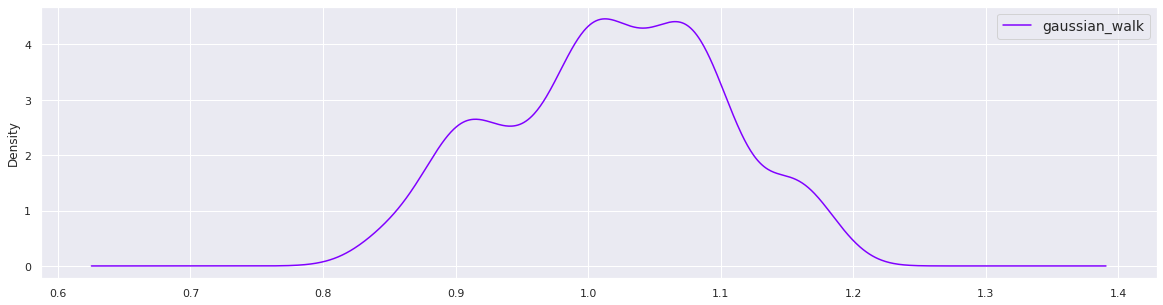

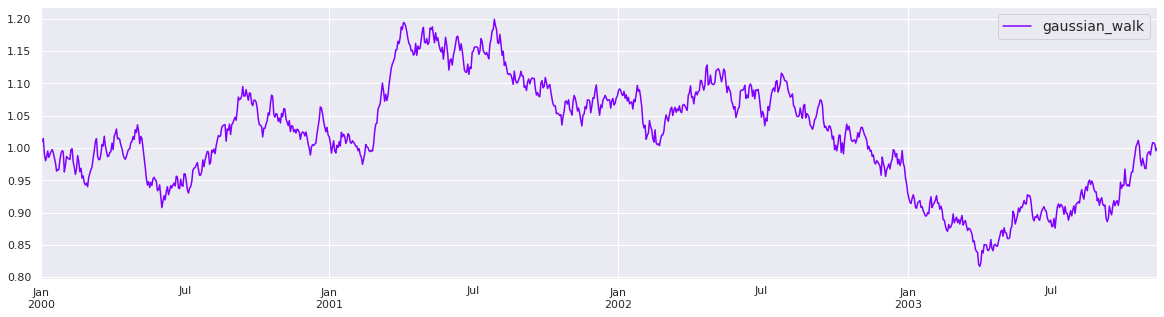

In [4]:
plot.plot_cols(price)

### Price wavelet decomposition

In [5]:
price_smooth, price_detail = sigp.get_swt(price, wavelet="haar")

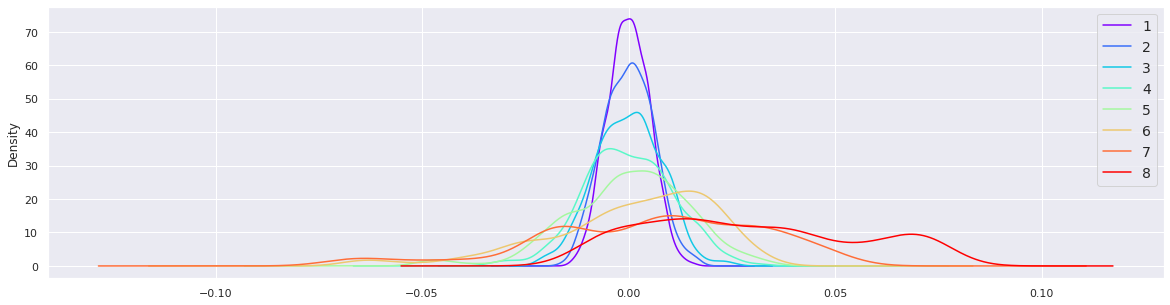

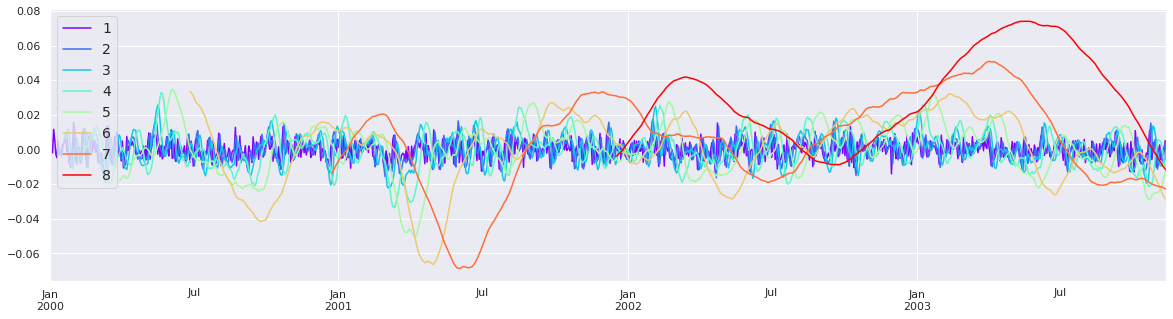

In [6]:
plot.plot_cols(price_detail)

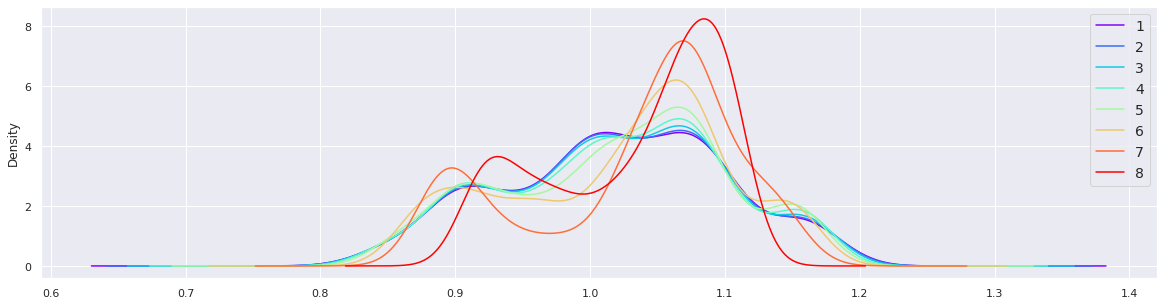

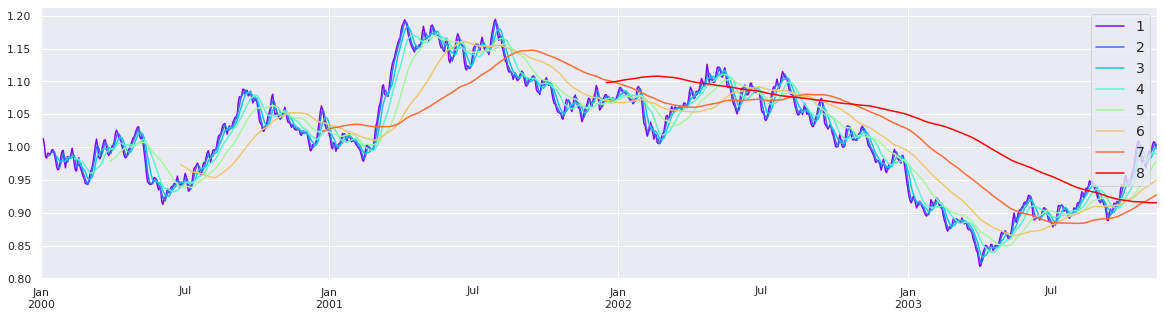

In [7]:
plot.plot_cols(price_smooth)

,1,2,3,4,5,6,7,8
1,1.000000,0.392166,0.136112,0.004698,0.011240,0.007102,0.004784,-0.041043
2,0.392166,1.000000,0.482442,0.102822,0.046823,0.026391,0.012437,-0.064658
3,0.136112,0.482442,1.000000,0.465498,0.148844,0.080741,0.038401,-0.074517
4,0.004698,0.102822,0.465498,1.000000,0.480547,0.201081,0.093342,-0.102297
5,0.011240,0.046823,0.148844,0.480547,1.000000,0.538076,0.223564,-0.057396
6,0.007102,0.026391,0.080741,0.201081,0.538076,1.000000,0.541308,0.021124
7,0.004784,0.012437,0.038401,0.093342,0.223564,0.541308,1.000000,0.365794
8,-0.041043,-0.064658,-0.074517,-0.102297,-0.057396,0.021124,0.365794,1.000000


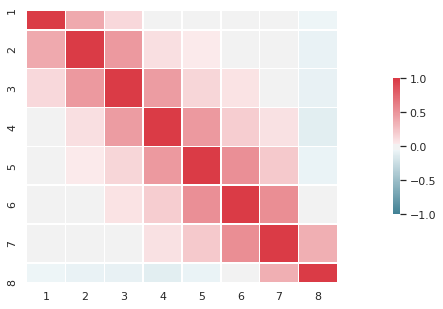

In [8]:
plot.plot_correlation_matrix(price_detail, mode="heatmap")

## Returns

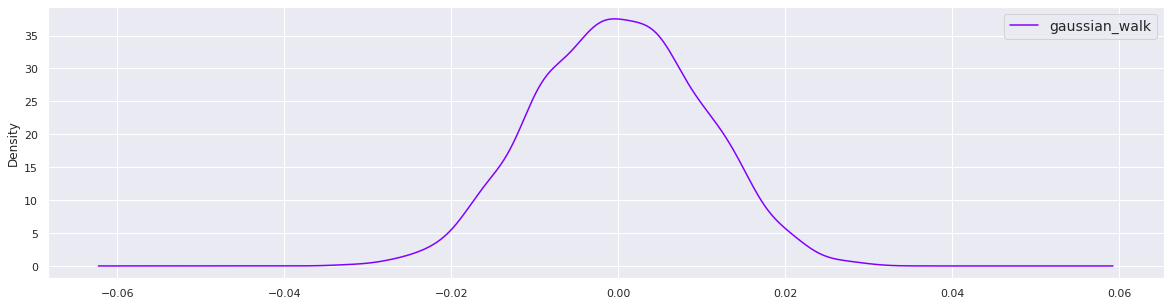

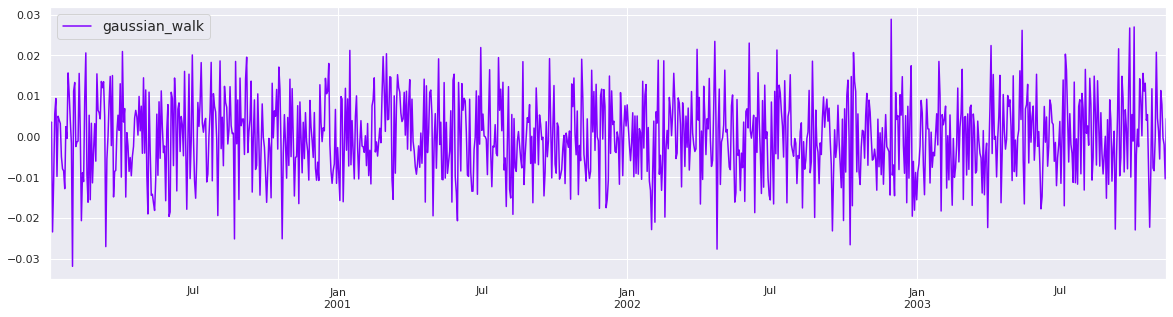

In [9]:
plot.plot_cols(rets)

In [10]:
stats.apply_normality_test(rets.to_frame())

,gaussian_walk
statistic,3.608594
pvalue,0.164590


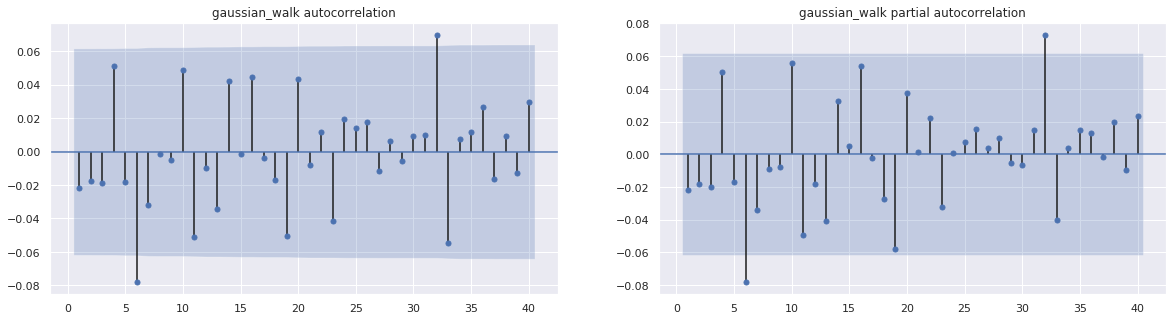

In [11]:
plot.plot_autocorrelation(rets)

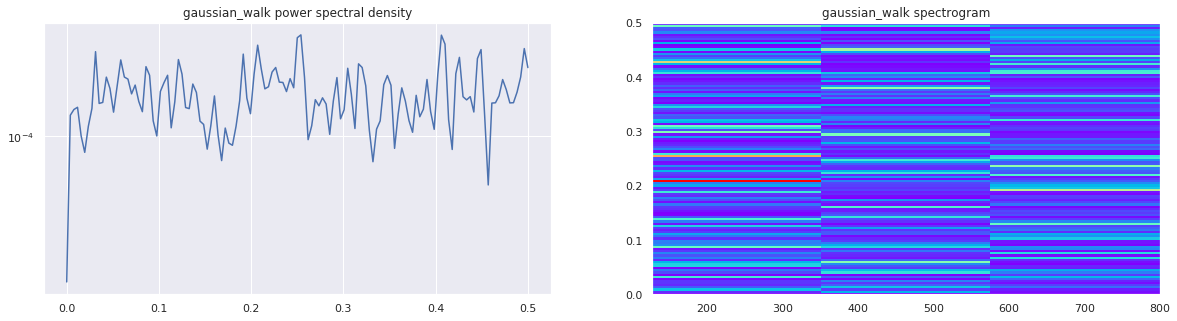

In [12]:
plot.plot_spectrum(rets)

### Returns wavelet decomposition

In [13]:
rets_smooth, rets_detail = sigp.get_swt(rets, "haar")

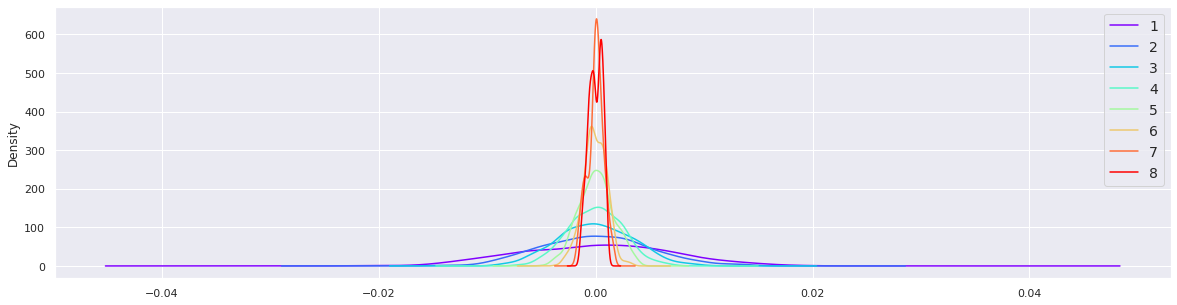

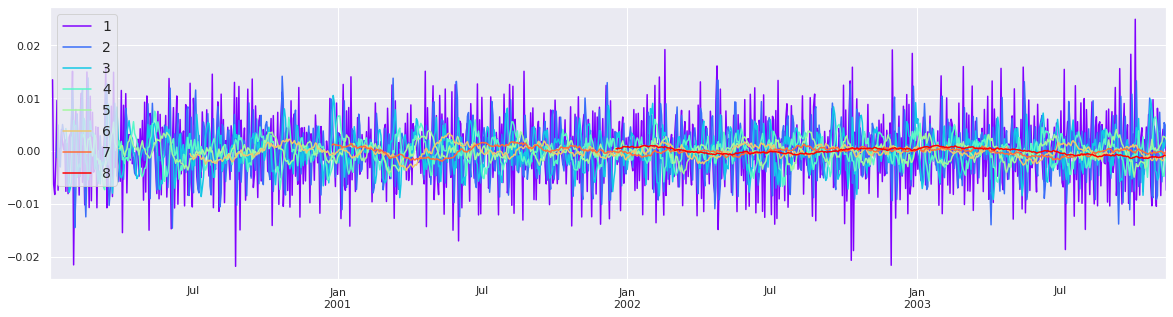

In [14]:
plot.plot_cols(rets_detail)

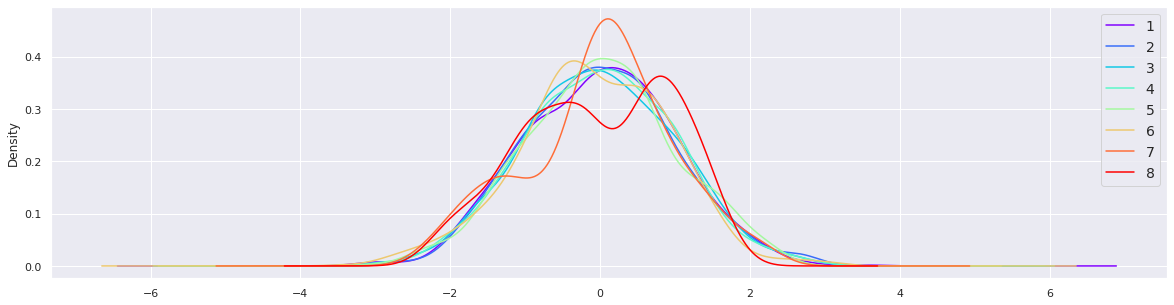

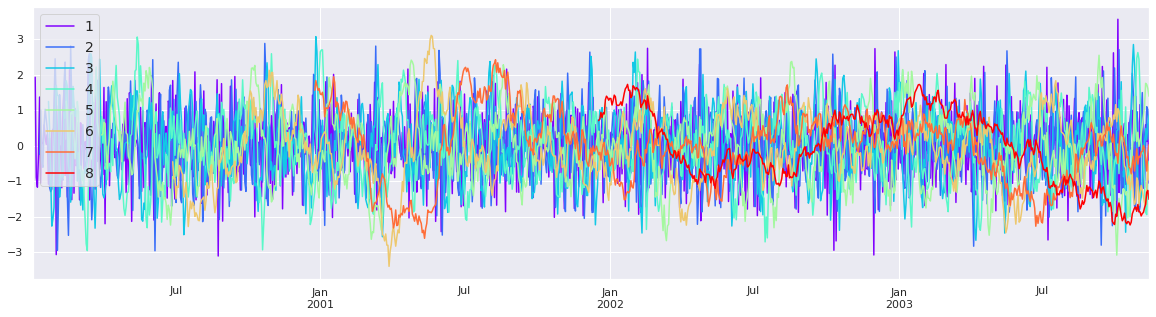

In [15]:
plot.plot_cols(rets_detail, mode="renormalize")

In [16]:
stats.apply_normality_test(rets_detail)

,1,2,3,4,5,6,7,8
statistic,0.895588,2.350630,4.066594,0.760269,2.836154,3.865743,8.568912,7.833619e+01
pvalue,0.639036,0.308722,0.130903,0.683769,0.242179,0.144732,0.013781,9.761427e-18


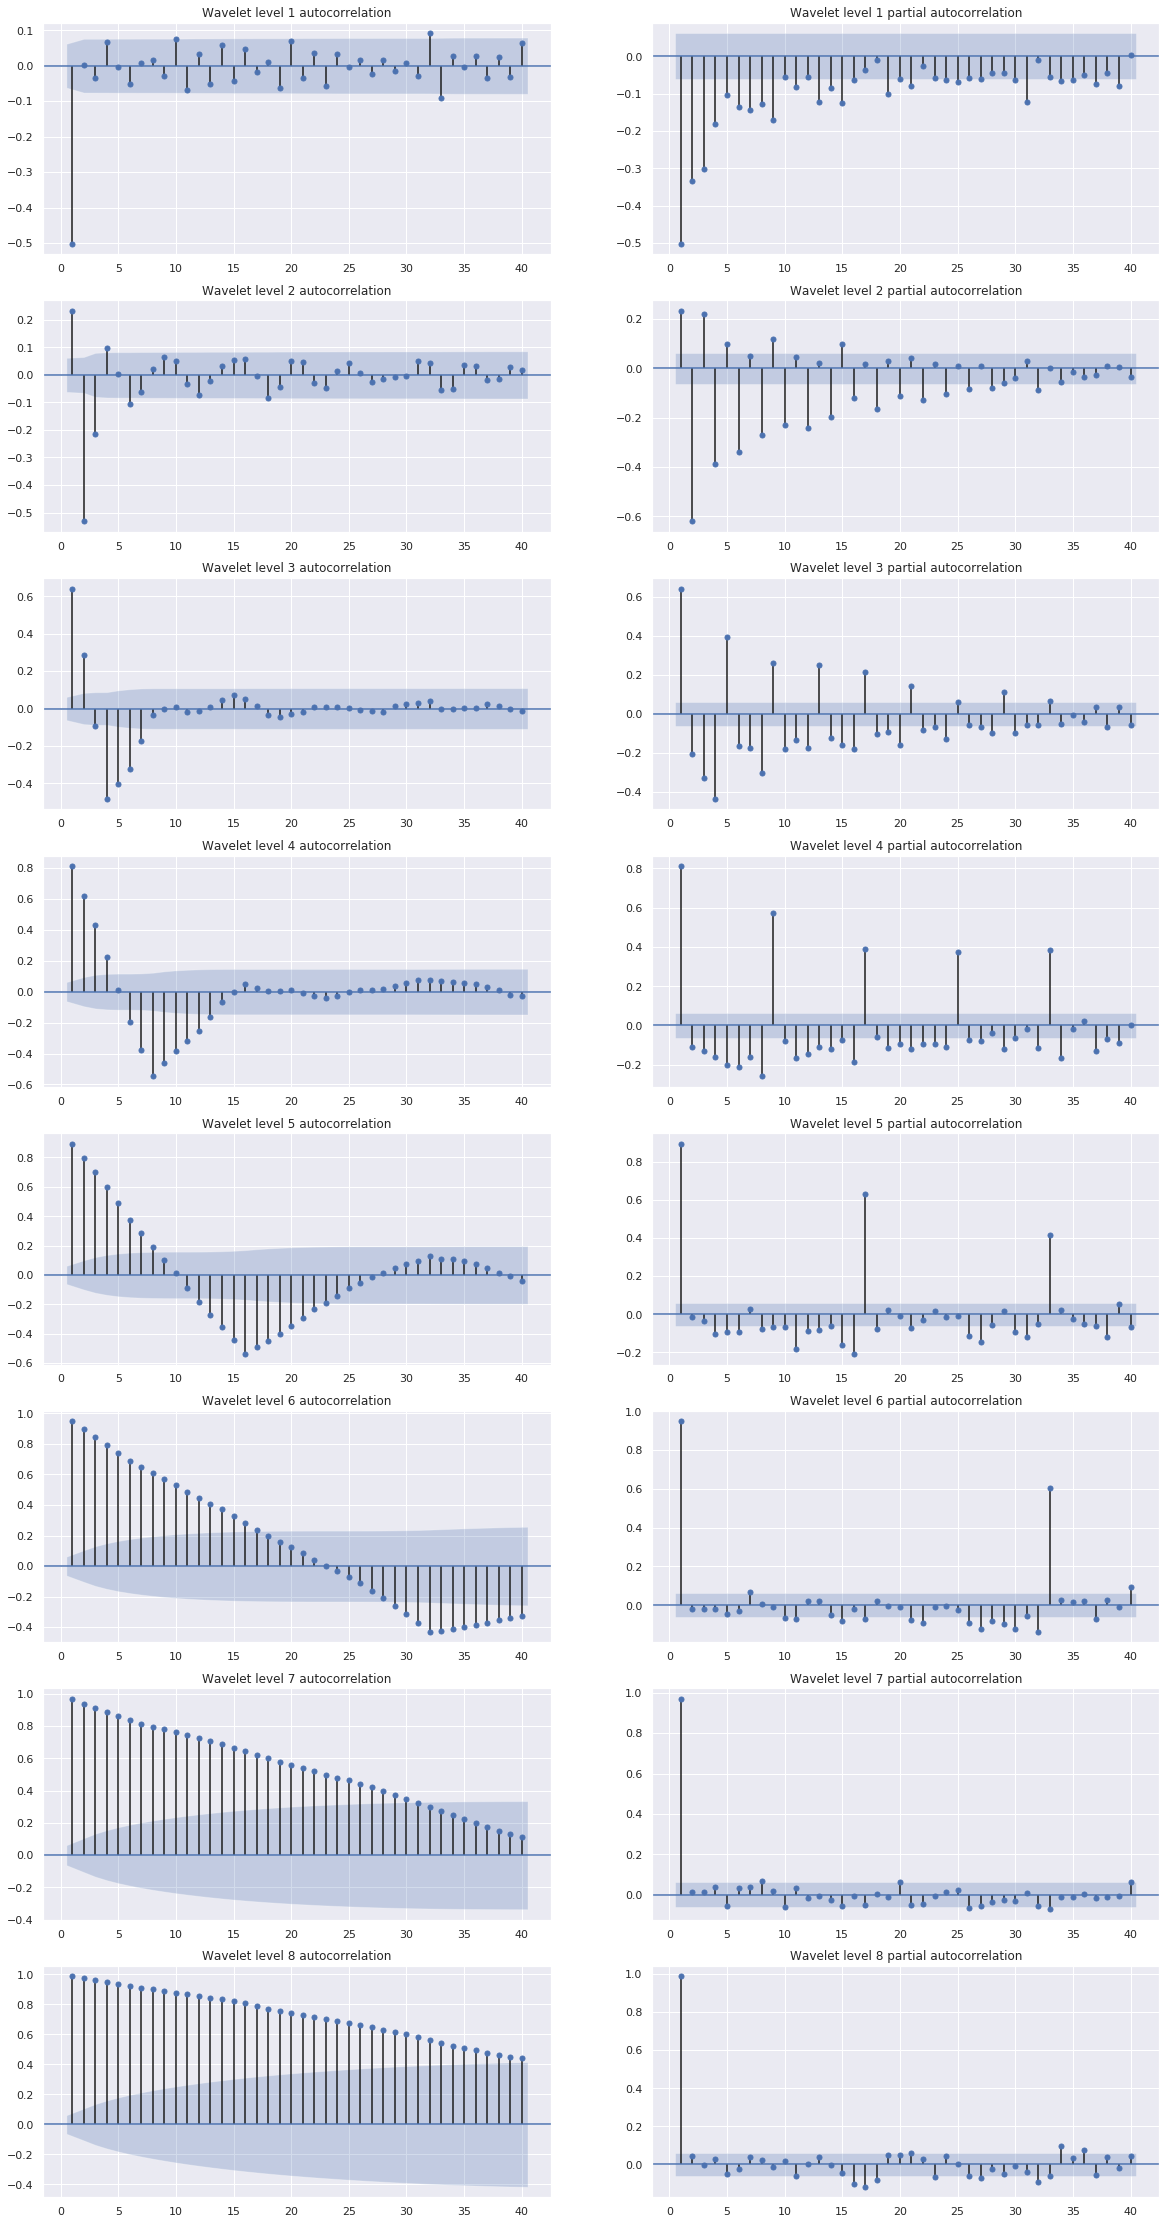

In [17]:
plot.plot_autocorrelation(rets_detail, title_prefix="Wavelet level ")

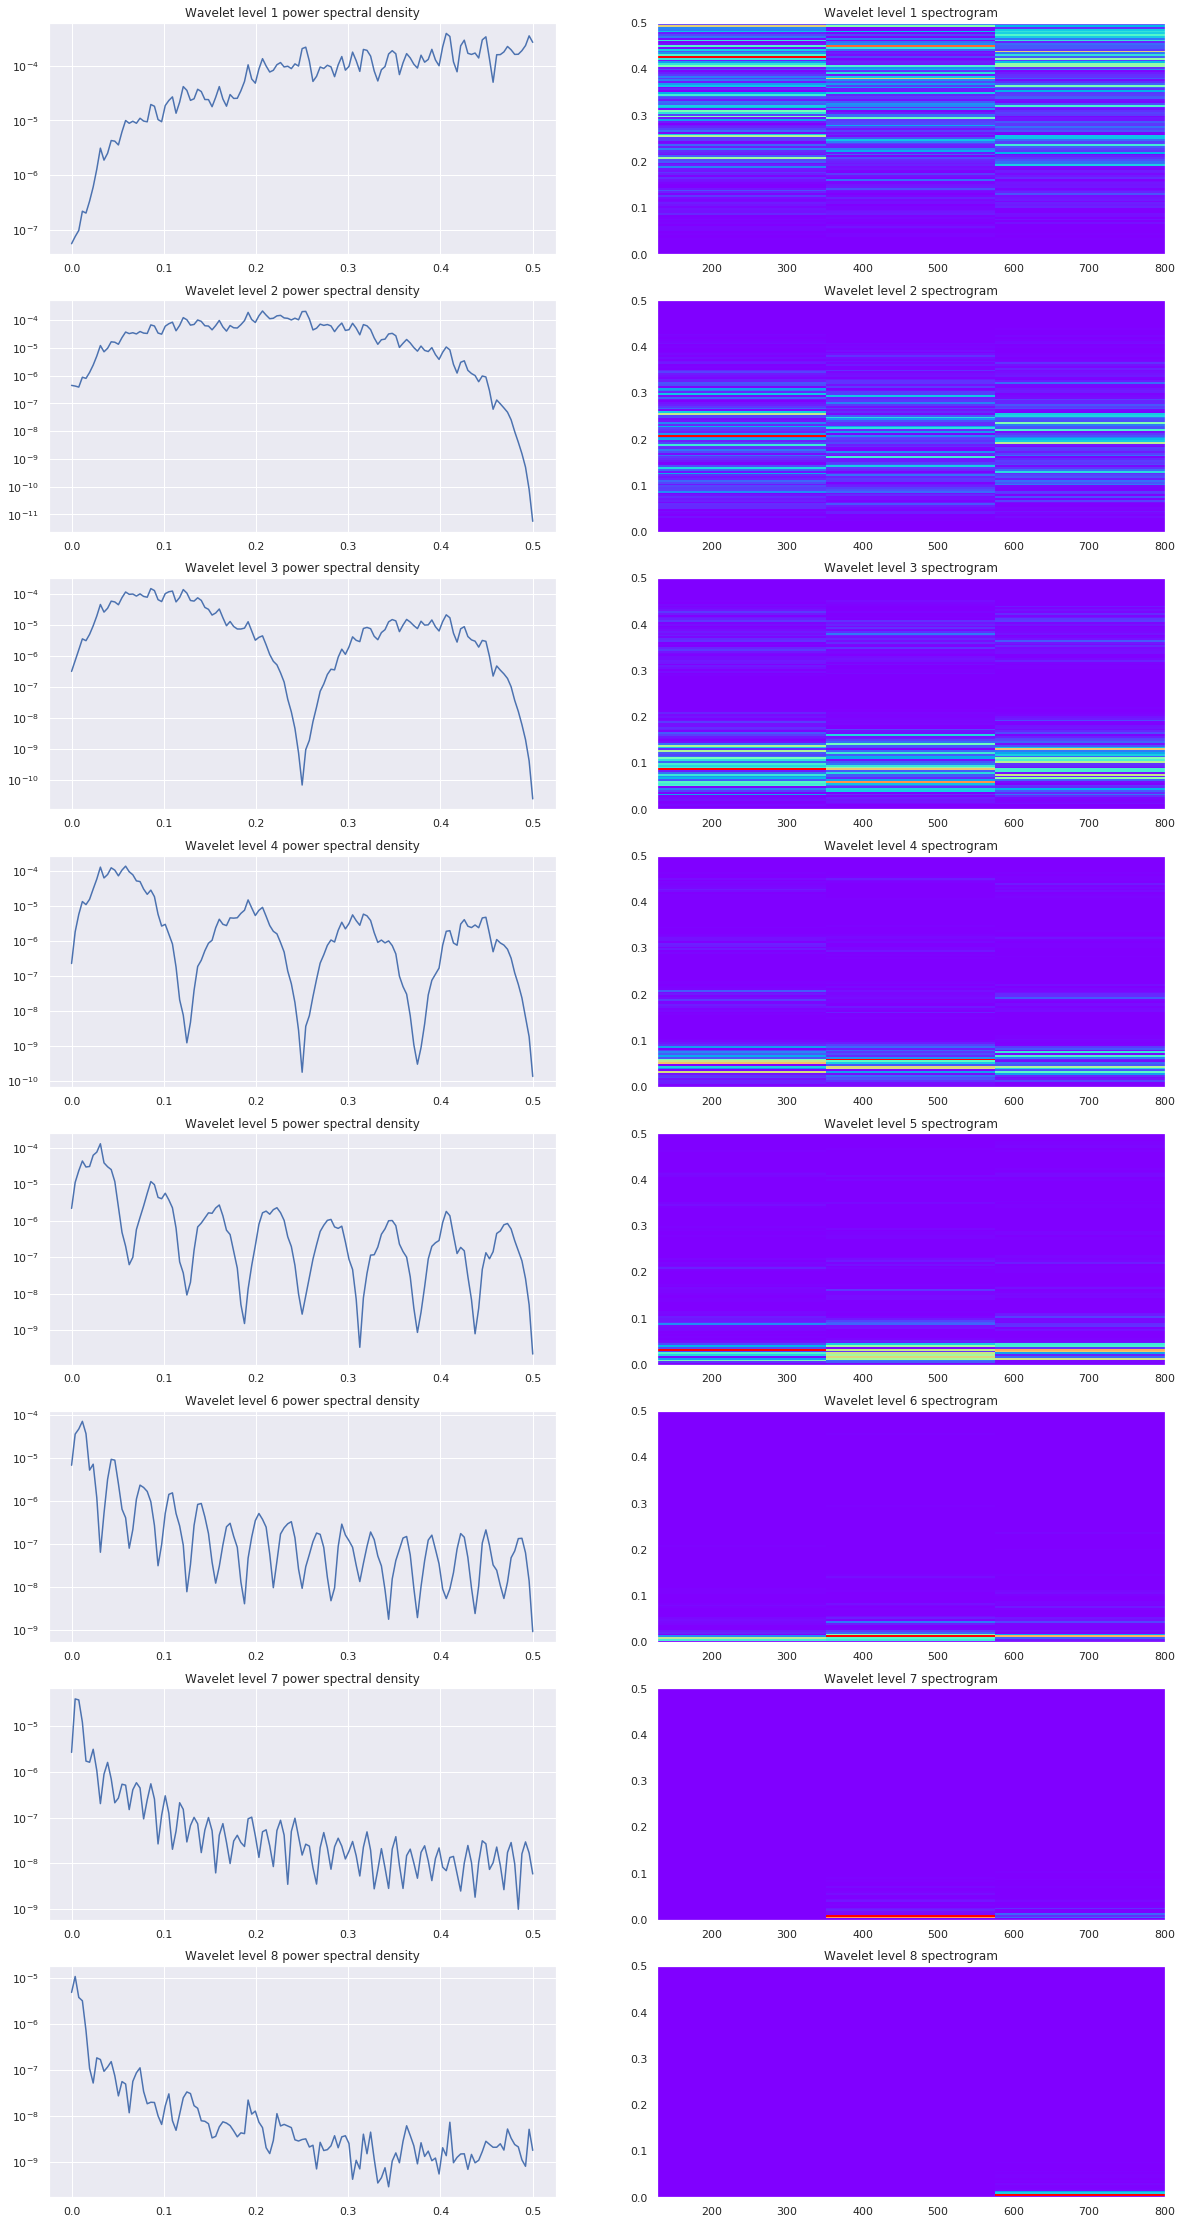

In [18]:
plot.plot_spectrum(rets_detail, title_prefix="Wavelet level ")

,1,2,3,4,5,6,7,8
1,1.000000,-0.002610,0.003648,-0.007903,0.006709,0.004371,0.001548,0.001660
2,-0.002610,1.000000,0.023033,-0.051522,0.018240,0.007732,-0.001660,0.001993
3,0.003648,0.023033,1.000000,0.001687,-0.006926,0.037092,0.000082,0.018072
4,-0.007903,-0.051522,0.001687,1.000000,-0.036773,0.049487,0.037326,0.001352
5,0.006709,0.018240,-0.006926,-0.036773,1.000000,0.019235,0.022825,0.073409
6,0.004371,0.007732,0.037092,0.049487,0.019235,1.000000,0.030172,0.151554
7,0.001548,-0.001660,0.000082,0.037326,0.022825,0.030172,1.000000,0.146238
8,0.001660,0.001993,0.018072,0.001352,0.073409,0.151554,0.146238,1.000000


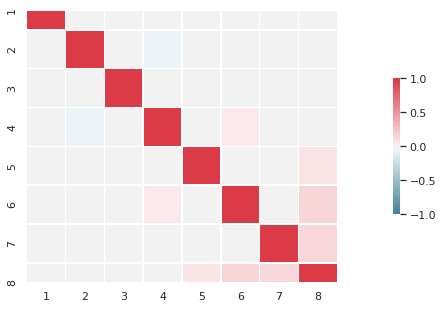

In [19]:
plot.plot_correlation_matrix(rets_detail, mode="heatmap")

### Z-scored returns

In [20]:
zscored_rets = sigp.get_dyadic_zscored(rets, demean=False)

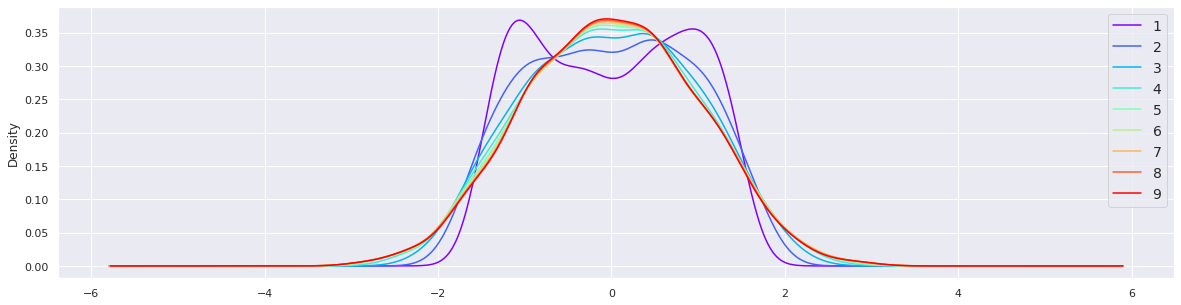

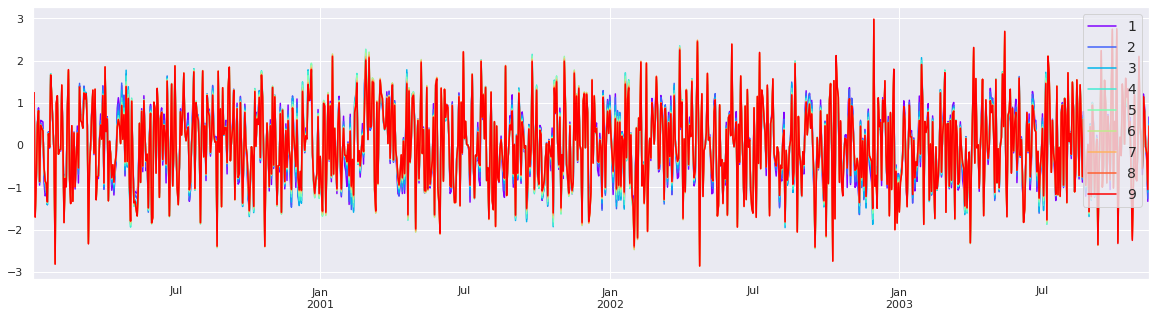

In [21]:
plot.plot_cols(zscored_rets)

In [22]:
stats.apply_normality_test(zscored_rets)

,1,2,3,4,5,6,7,8,9
statistic,2675.129664,2.448352e+02,6.694440e+01,25.677689,13.455280,8.662063,6.324250,5.208930,4.770556
pvalue,0.000000,6.834421e-54,2.905421e-15,0.000003,0.001197,0.013154,0.042336,0.073943,0.092063


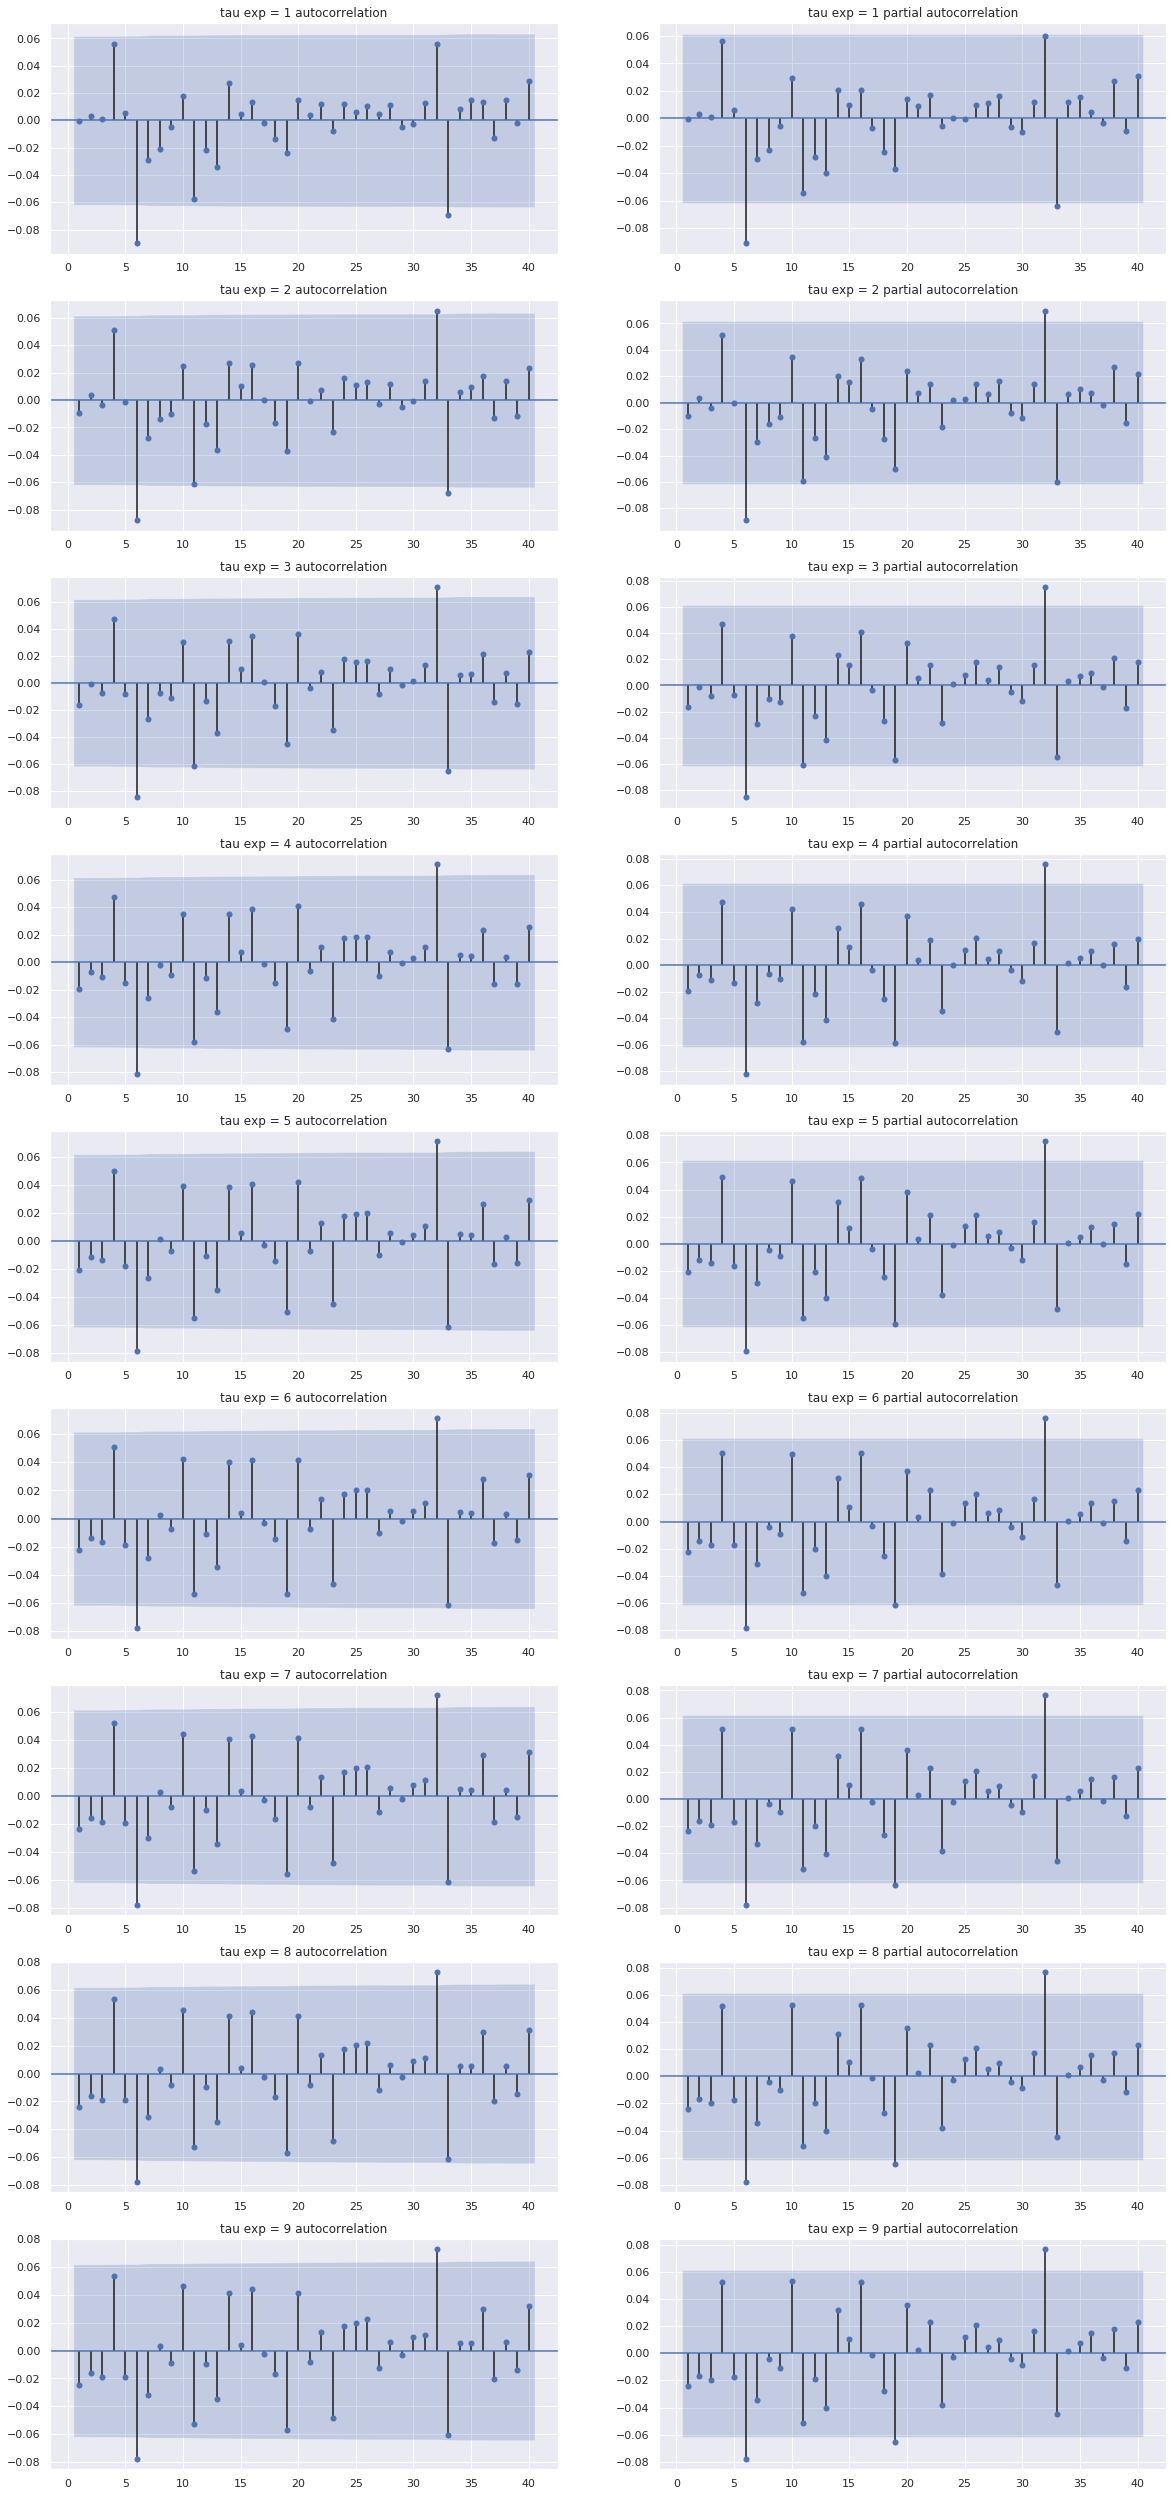

In [23]:
plot.plot_autocorrelation(zscored_rets, title_prefix="tau exp = ")

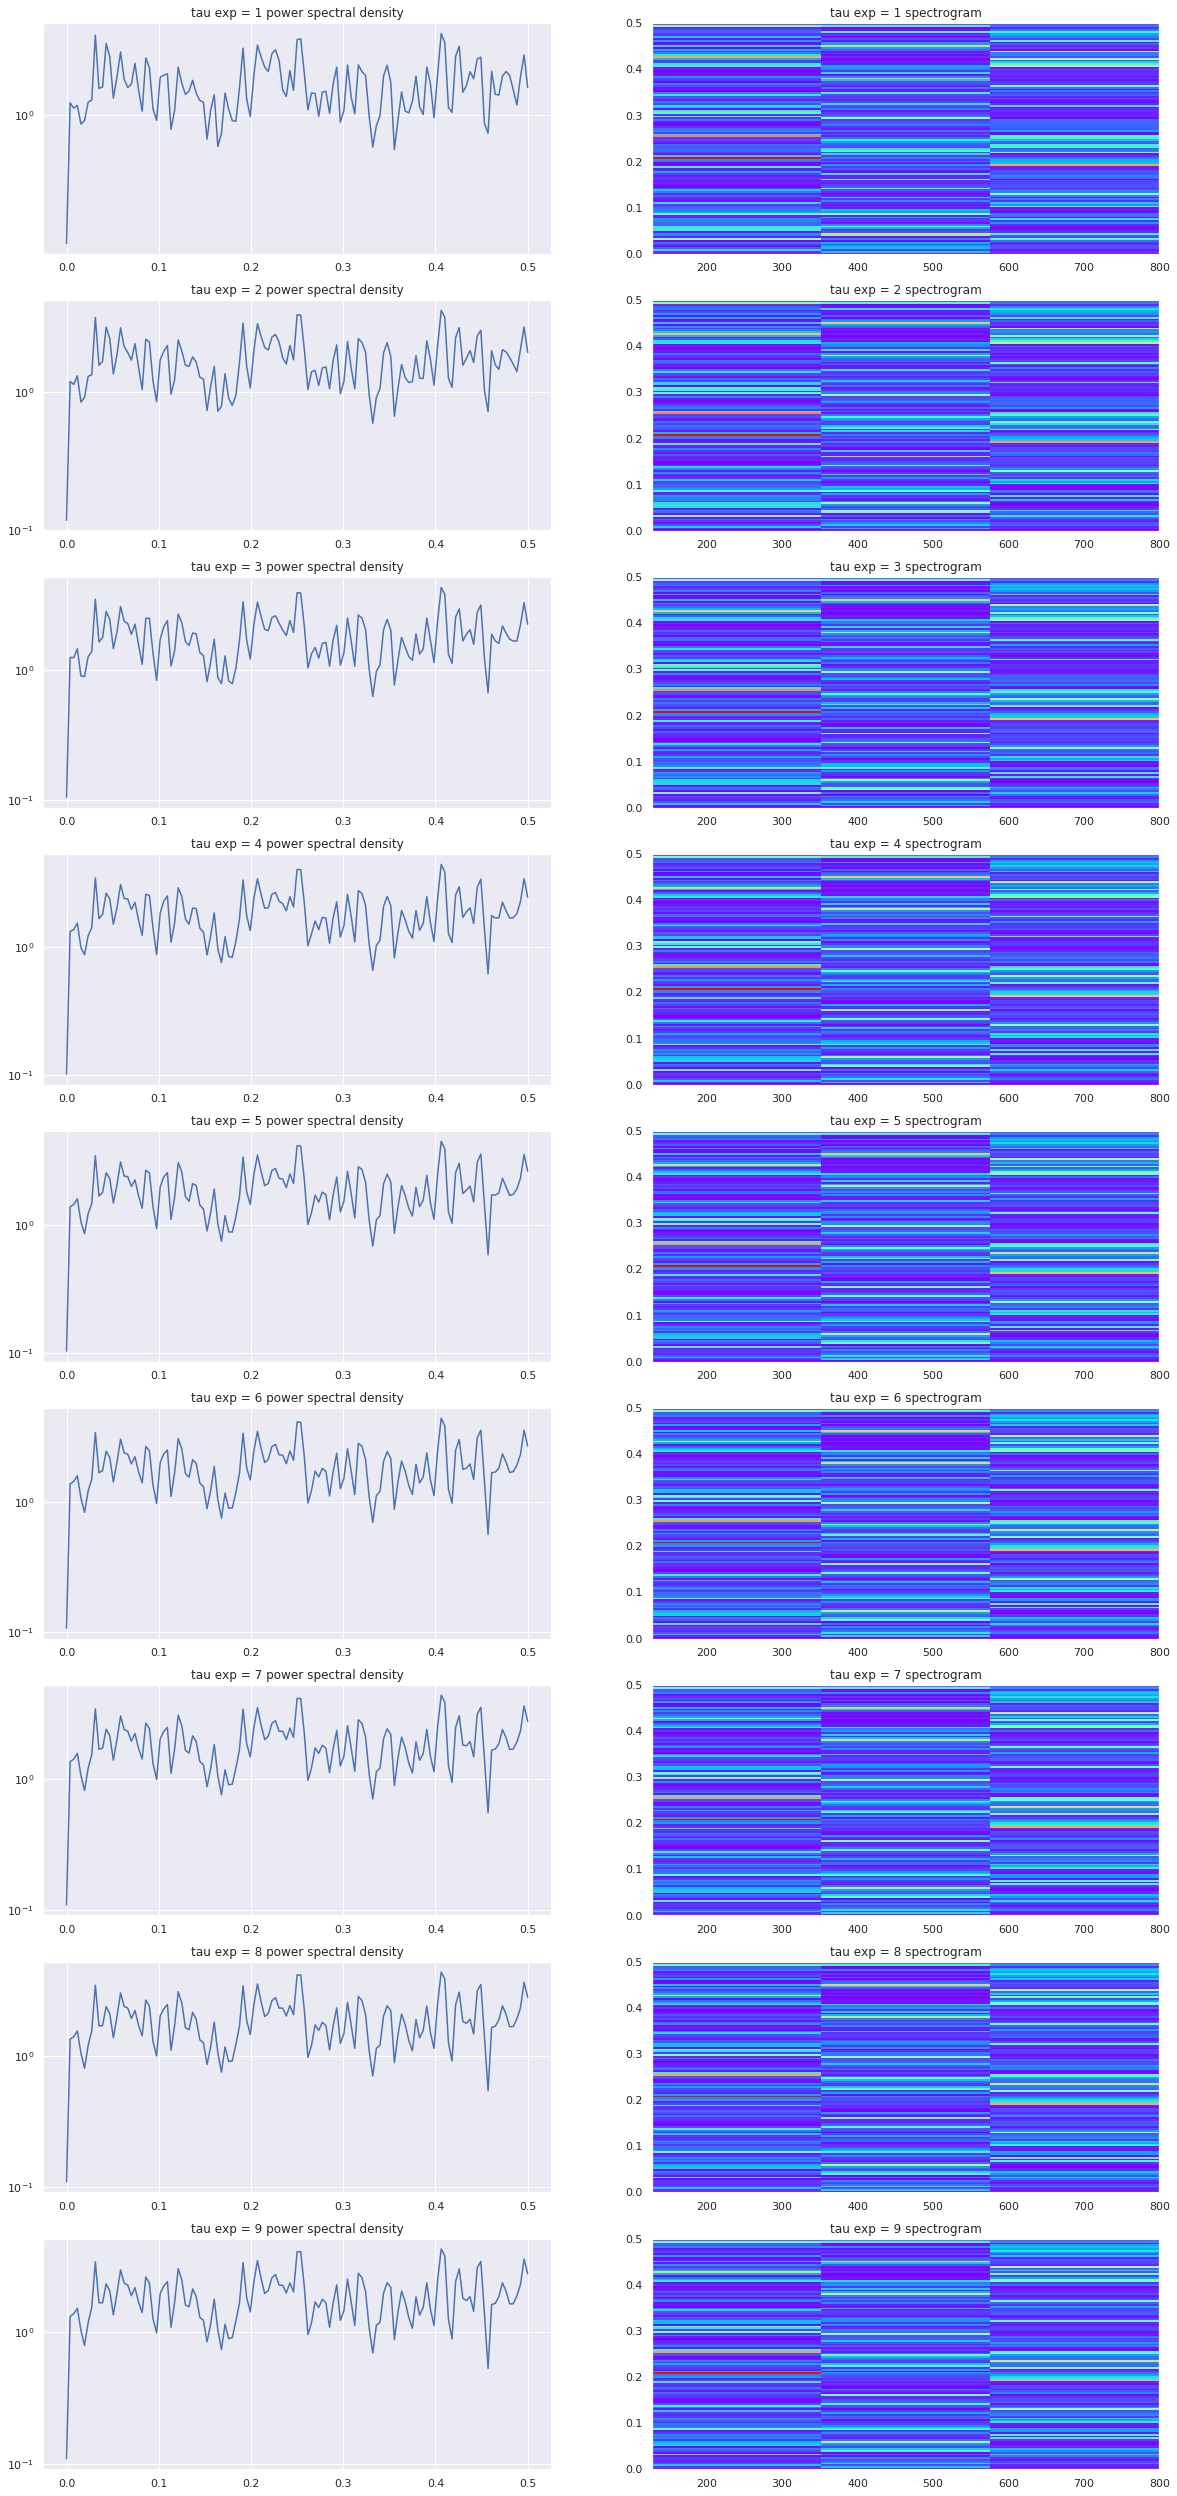

In [24]:
plot.plot_spectrum(zscored_rets, title_prefix="tau exp = ")

# EMAs

In [25]:
impulse = sig_gen.get_impulse(-252, 3 * 252, tick=1)

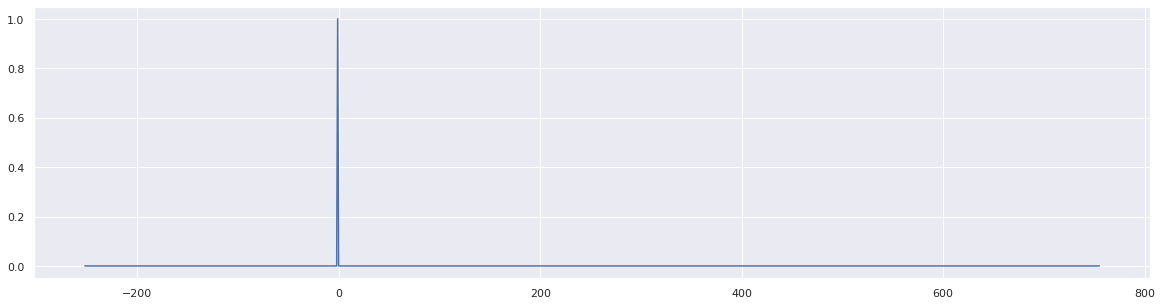

In [26]:
impulse.plot()

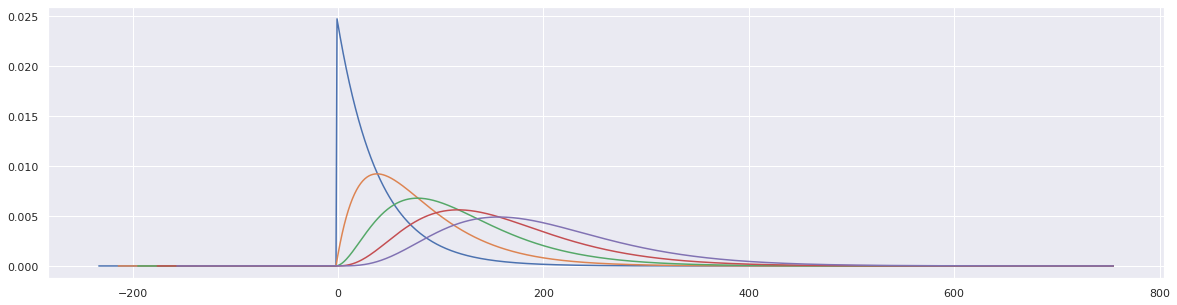

In [27]:
for i in range(1, 6):
    sigp.compute_ema(impulse, tau=40, min_periods=20, depth=i).plot()

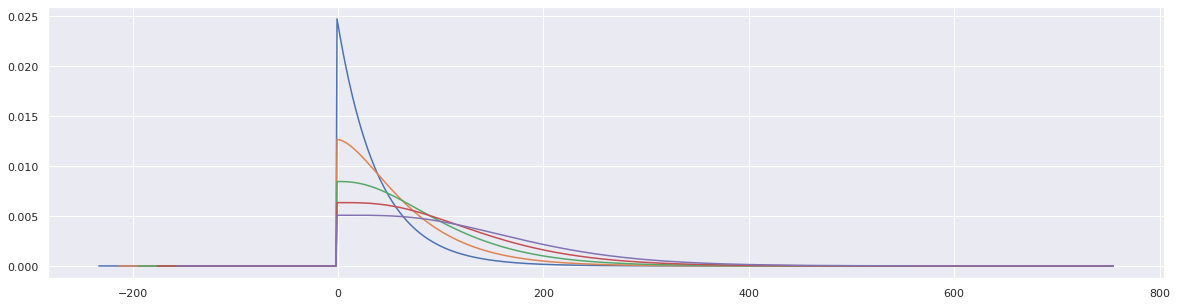

In [28]:
for i in range(1, 6):
    sigp.compute_smooth_moving_average(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=i
    ).plot()

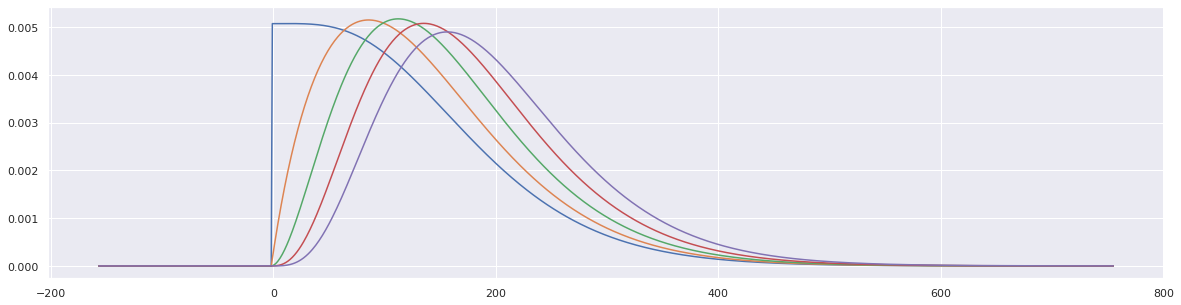

In [29]:
for i in range(1, 6):
    sigp.compute_smooth_moving_average(
        impulse, tau=40, min_periods=20, min_depth=i, max_depth=5
    ).plot()

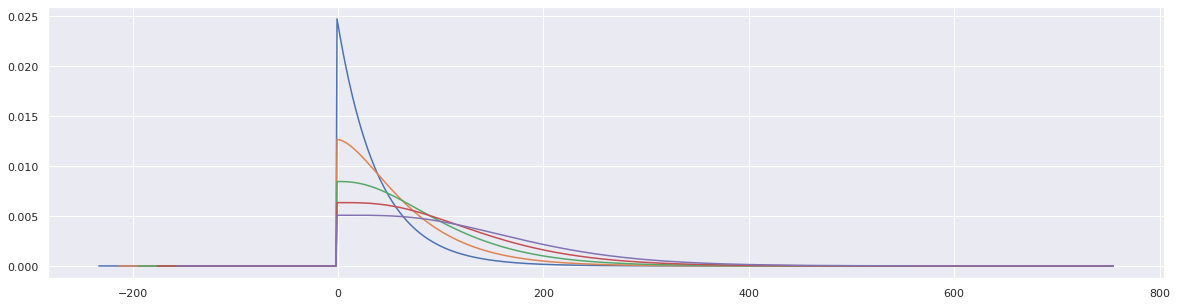

In [30]:
for i in range(1, 6):
    sigp.compute_rolling_norm(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=i, p_moment=1
    ).plot()

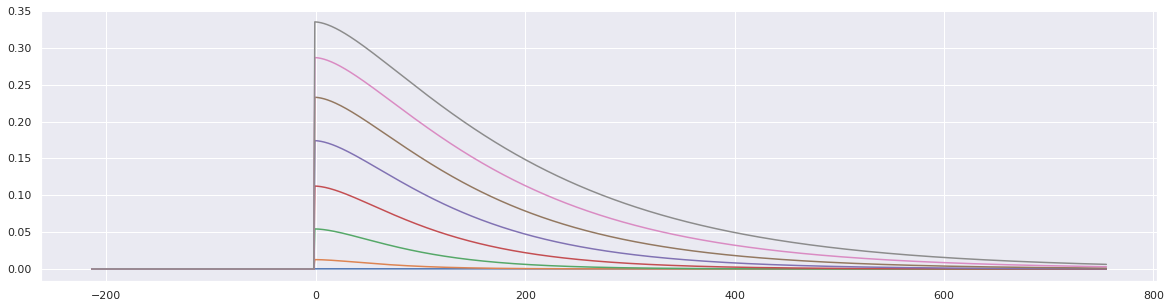

In [31]:
for i in np.arange(0.5, 4.5, 0.5):
    sigp.compute_rolling_norm(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=2, p_moment=i
    ).plot()

# Outliers handling

[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079]


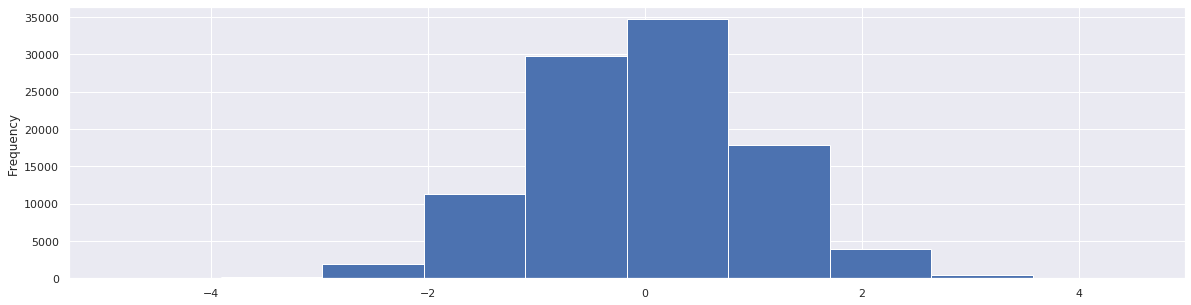

In [32]:
np.random.seed(100)
n = 100000
data = np.random.normal(loc=0.0, scale=1.0, size=n)
print(data[:5])

srs = pd.Series(data)
srs.plot(kind="hist")

In [33]:
def _analyze(srs):
    print(np.isnan(srs).sum())
    srs.plot(kind="hist")
    plt.show()
    pprint.pprint(stats)

0


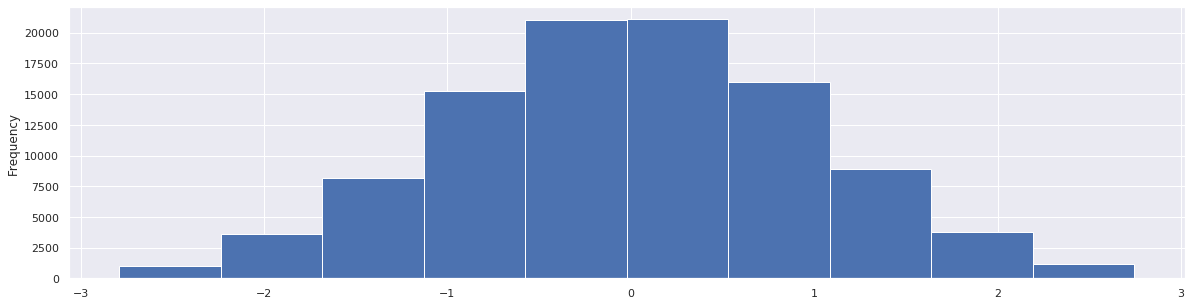

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'winsorize'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  2.370013
99996 -2.360705  2.370013
99997 -2.360705  2.370013
99998 -2.360705  2.370013
99999 -2.360705  2.370013

[100000 rows x 2 columns]),
             ('num_elems_removed', 2036),
             ('num_elems_after', 97964),
             ('percentage_removed', 2.036),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [34]:
mode = "winsorize"
lower_quantile = 0.01
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=stats
)
#
_analyze(srs_out)

0


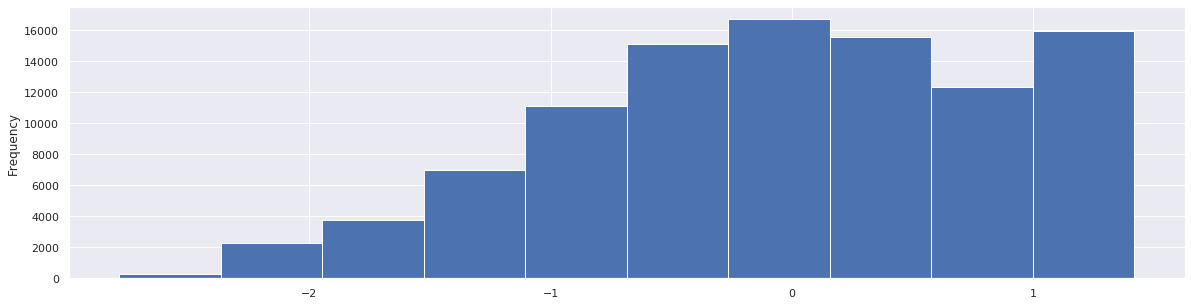

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.9)),
             ('mode', 'winsorize'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  1.185876
99996 -2.360705  1.185876
99997 -2.360705  1.185876
99998 -2.360705  1.185876
99999 -2.360705  1.185876

[100000 rows x 2 columns]),
             ('num_elems_removed', 11031),
             ('num_elems_after', 88969),
             ('percentage_removed', 11.031),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [35]:
mode = "winsorize"
lower_quantile = 0.01
upper_quantile = 0.90
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs,
    mode,
    lower_quantile,
    upper_quantile=upper_quantile,
    window=window,
    min_periods=min_periods,
    info=stats,
)
#
_analyze(srs_out)

2036


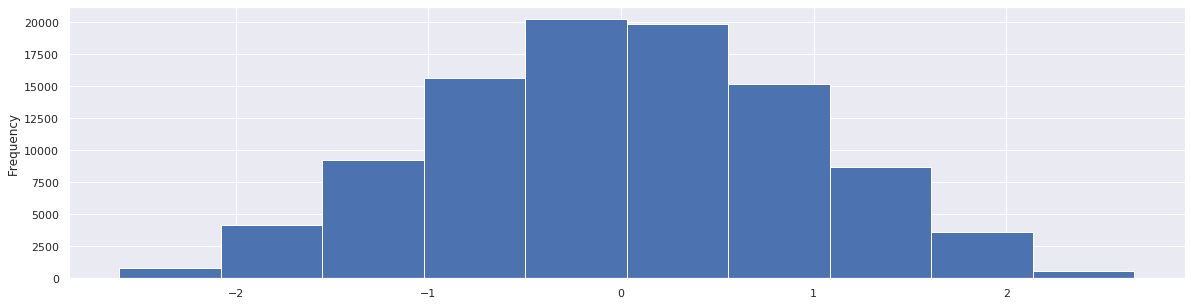

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'set_to_nan'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  2.370013
99996 -2.360705  2.370013
99997 -2.360705  2.370013
99998 -2.360705  2.370013
99999 -2.360705  2.370013

[100000 rows x 2 columns]),
             ('num_elems_removed', 2036),
             ('num_elems_after', 97964),
             ('percentage_removed', 2.036),
             ('num_nans_after', 2036),
             ('num_infs_after', 0)])


In [36]:
mode = "set_to_nan"
lower_quantile = 0.01
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=stats
)
#
_analyze(srs_out)

0


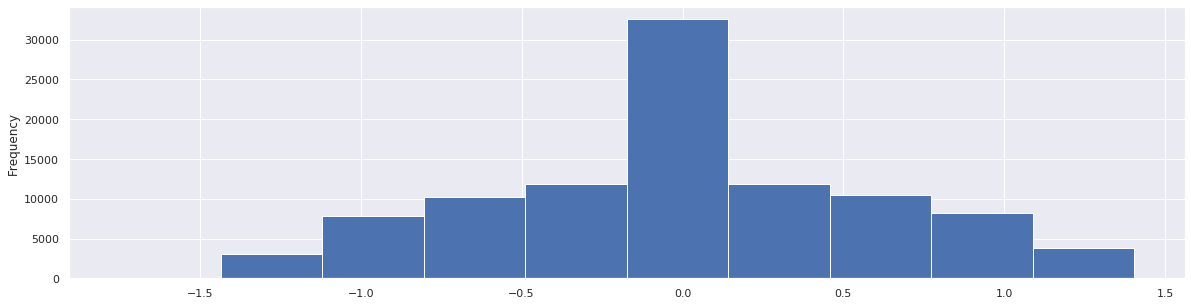

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.1, 0.9)),
             ('mode', 'set_to_zero'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -1.332348  1.185876
99996 -1.331786  1.185876
99997 -1.332348  1.185876
99998 -1.331786  1.185876
99999 -1.331786  1.185876

[100000 rows x 2 columns]),
             ('num_elems_removed', 19999),
             ('num_elems_after', 80001),
             ('percentage_removed', 19.999),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [37]:
mode = "set_to_zero"
lower_quantile = 0.10
window = 1000
min_periods = 10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=stats
)
#
_analyze(srs_out)